## Import libraries

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss
plt.style.use("ggplot")

from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
%matplotlib inline

## Import Data

In [ ]:
df = pd.read_csv('dataset.csv')
for i in range(len(df)):
    df.loc[i,'dastgah'] = df.iloc[i]['dastgah'].replace("D_","")

## Data Normalization & Test Train Split

In [ ]:
features = df.iloc[: , 3:]
labels = df.iloc[: , 1]
labels = labels.astype('int')
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=13)

In [ ]:
# sc = StandardScaler()
sc = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

# Clustering


## Gathering Data for clustering

We used PCA data here and kept all 69 features

In [ ]:
# Generating PCA data to use for clustering
n_components = 69
pca = PCA(n_components)

X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n_components)])
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n_components)])

## Visualization

Here We define a function that we are going to use for visualizing our data

In [ ]:
def visualize_clustring_result(model, feature1, feature2, feature3 ,data_in, title, y):
    fig = plt.figure(figsize = (18, 6)) 

    ax = fig.add_subplot(1, 2, 1)
    plot = ax.scatter(feature1, feature2, c = model.fit_predict(data_in), cmap ='rainbow')
    plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y)))
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    plt.title(title + " in 2D")

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot = ax.scatter(feature1, feature2, c = model.fit_predict(data_in), cmap ='rainbow')
    plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y)))
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title(title + " in 3D")

    plt.show()
    print("\n", "\n")


## K-Means

Here we define a function that will apply k-means algoeithm on our PCA data and will use the above function to visualize them. Although we used Silhouette score and accuracy score to validate our clustering performance.

In [ ]:
def run_KMeans_cluster(k=7):
    print("For clusster number: ", k)
    print()
    kMeans = KMeans(n_clusters=k, init='k-means++', random_state=2, algorithm='elkan', max_iter=100)
    kMeans.fit(X_train_pca, y_train)
    
    print("kMeans train accuracy score: ", accuracy_score(np.array(y_train), kMeans.predict(X_train_pca))*100)
    print("kMeans train silhouette score: ", silhouette_score(X_train_pca, kMeans.predict(X_train_pca), random_state=2))
    print("kMeans test accuracy score: ", accuracy_score(np.array(y_test), kMeans.predict(X_test_pca))*100)
    print("kMeans test silhouette score: ", silhouette_score(X_test_pca, kMeans.predict(X_test_pca), random_state=2))
    print()

    visualize_clustring_result(kMeans, X_train_pca['PC1'], X_train_pca['PC2'], X_train_pca['PC3'], X_train, "kMeans Cluster: result of train", y_train)
    visualize_clustring_result(kMeans, X_test_pca['PC1'], X_test_pca['PC2'], X_test_pca['PC3'], X_test, "kMeans Cluster: result of test", y_test)

For clusster number:  2

kMeans train accuracy score:  14.265129682997118
kMeans train silhouette score:  0.09119590843297819
kMeans test accuracy score:  14.224137931034484
kMeans test silhouette score:  0.11541408314349894



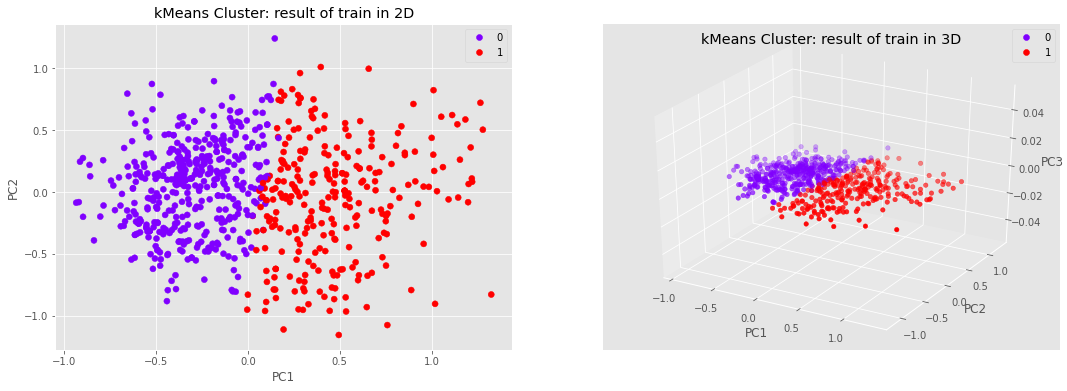

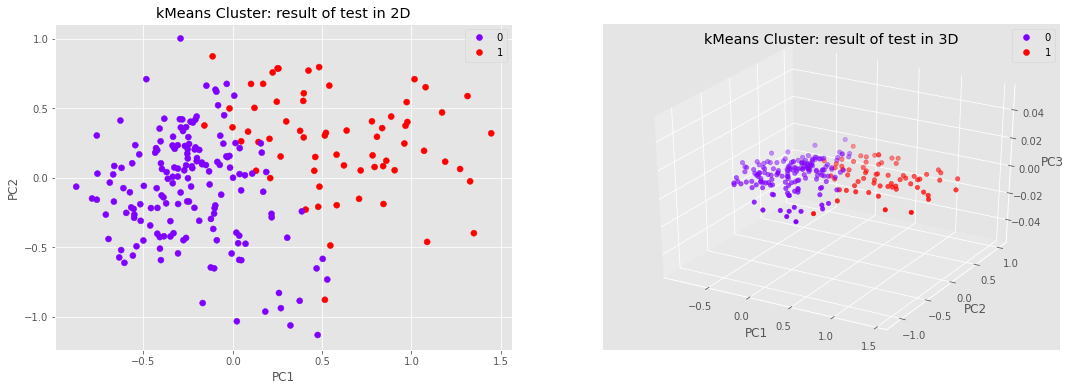


 

For clusster number:  7

kMeans train accuracy score:  14.553314121037463
kMeans train silhouette score:  0.06298135792541584
kMeans test accuracy score:  9.482758620689655
kMeans test silhouette score:  0.05077732528457653



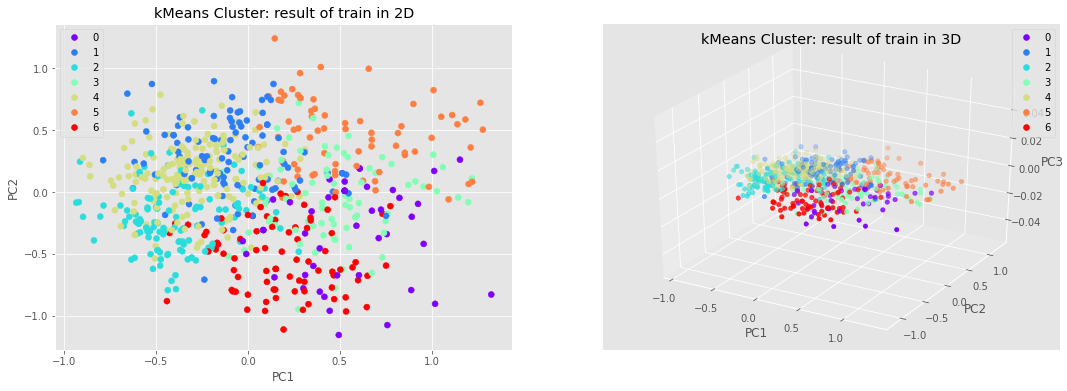

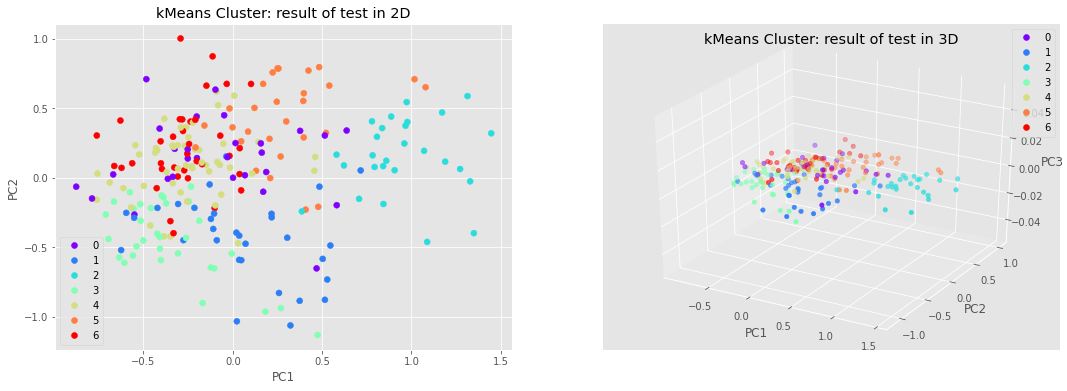


 

For clusster number:  20

kMeans train accuracy score:  5.043227665706052
kMeans train silhouette score:  0.0696346783075996
kMeans test accuracy score:  5.172413793103448
kMeans test silhouette score:  0.046188463402738376



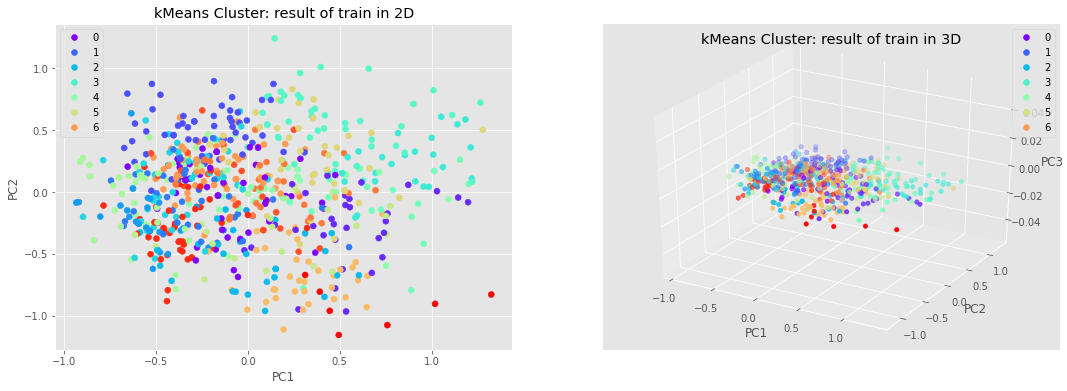

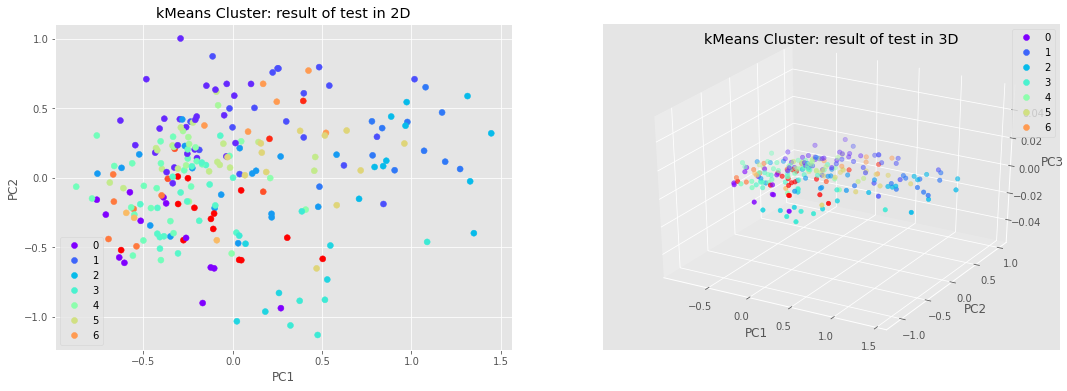

In [ ]:
run_KMeans_cluster(2)
run_KMeans_cluster(7)
run_KMeans_cluster(20)


## K-Medoids

In [ ]:
def run_kMedoids_cluster(k=5):
    print("For clusster number: ", k)
    print()
    kMedoids = KMedoids(n_clusters=k, init='k-medoids++', random_state=2, method='pam', max_iter=100)
    kMedoids.fit(X_train_pca, y_train)
    
    print("kMedoids train accuracy score: ", accuracy_score(np.array(y_train), kMedoids.predict(X_train_pca))*100)
    print("kMedoids train silhouette score: ", silhouette_score(X_train_pca, kMedoids.predict(X_train_pca), random_state=2))
    print("kMedoids test accuracy score: ", accuracy_score(np.array(y_test), kMedoids.predict(X_test_pca))*100)
    print("kMedoids test silhouette score: ", silhouette_score(X_test_pca, kMedoids.predict(X_test_pca), random_state=2))
    print()
    
    visualize_clustring_result(kMedoids, X_train_pca['PC1'], X_train_pca['PC2'], X_train_pca['PC3'], X_train, "kMedoids Cluster: result of train", y_train)
    visualize_clustring_result(kMedoids, X_test_pca['PC1'], X_test_pca['PC2'], X_test_pca['PC3'], X_test, "kMedoids Cluster: result of test", y_test)

For clusster number:  2

kMedoids train accuracy score:  15.706051873198849
kMedoids train silhouette score:  0.04077989683639509
kMedoids test accuracy score:  12.931034482758621
kMedoids test silhouette score:  0.033920844097241866



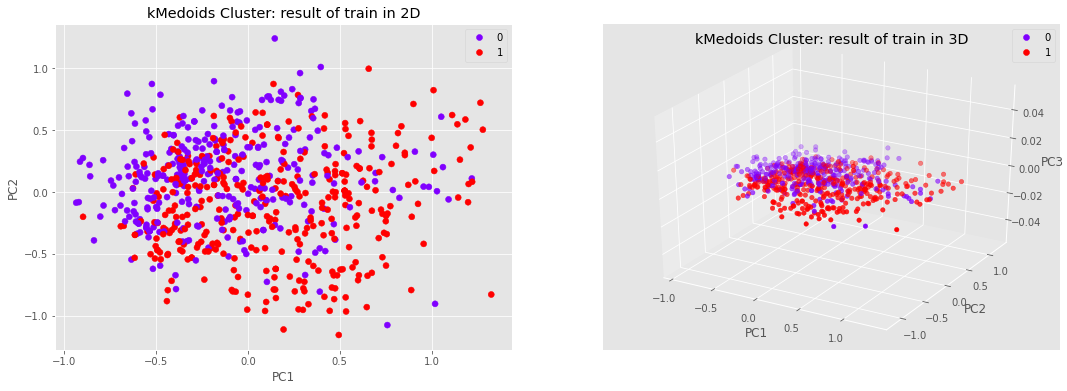

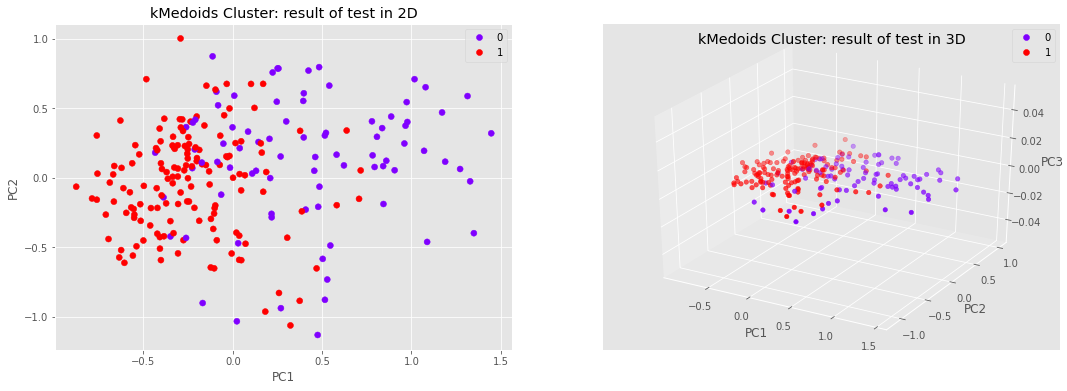


 

For clusster number:  7

kMedoids train accuracy score:  16.42651296829971
kMedoids train silhouette score:  0.03731540766701417
kMedoids test accuracy score:  18.96551724137931
kMedoids test silhouette score:  0.021517137796091757



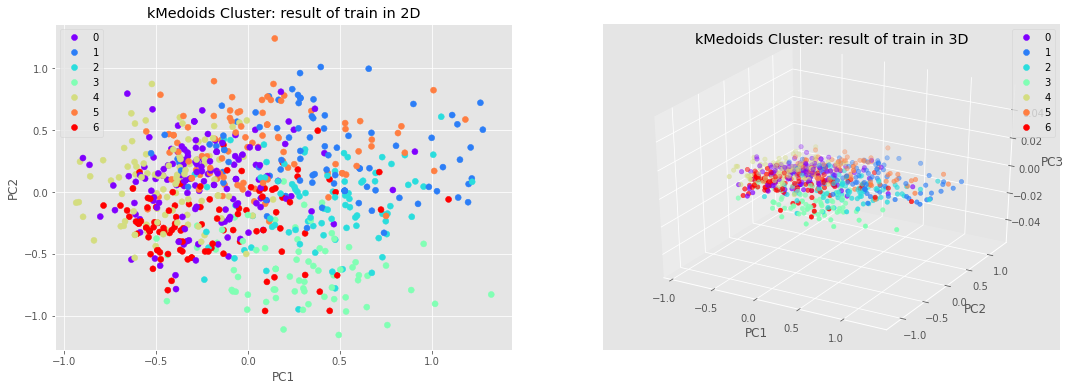

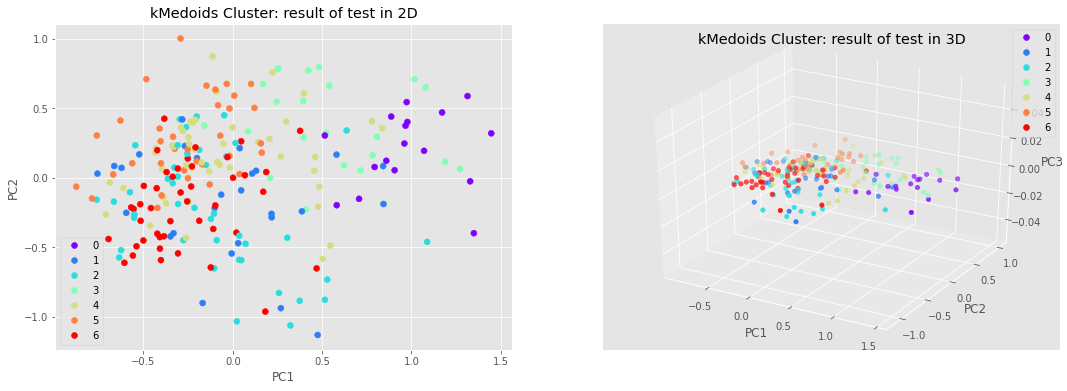


 

For clusster number:  20



/usr/local/lib/python3.8/dist-packages/sklearn_extra/cluster/_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


kMedoids train accuracy score:  7.060518731988473
kMedoids train silhouette score:  0.055663637934400656
kMedoids test accuracy score:  4.741379310344827
kMedoids test silhouette score:  0.028950954206781895



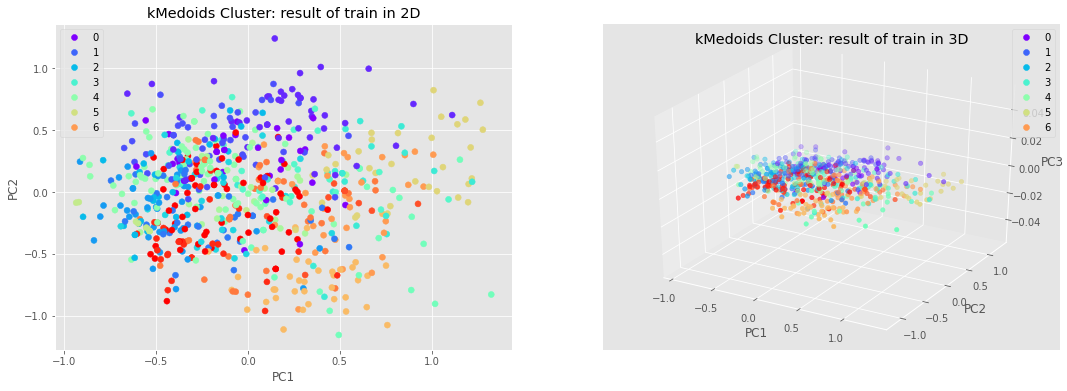

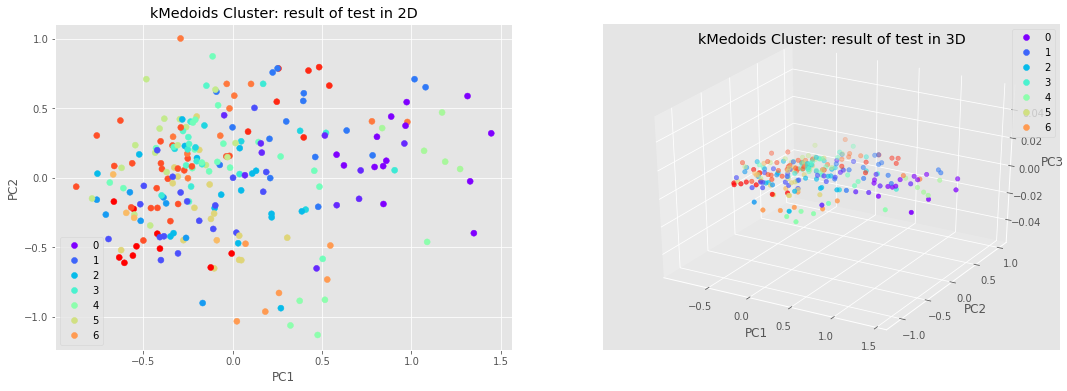

In [ ]:
run_kMedoids_cluster(2)
run_kMedoids_cluster(7)
run_kMedoids_cluster(20)